<a href="https://colab.research.google.com/github/norflin321/ml/blob/main/SDXL_sketch2img_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install accelerate transformers safetensors opencv-python diffusers &> /dev/null

from diffusers import ControlNetModel, StableDiffusionXLControlNetPipeline, AutoencoderKL
from diffusers.utils import load_image
from PIL import Image
import torch
import numpy as np
import cv2
from matplotlib import pyplot as plt
import datetime

controlnet = ControlNetModel.from_pretrained("diffusers/controlnet-canny-sdxl-1.0",torch_dtype=torch.float16)
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLControlNetPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",controlnet=controlnet,vae=vae,torch_dtype=torch.float16).to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

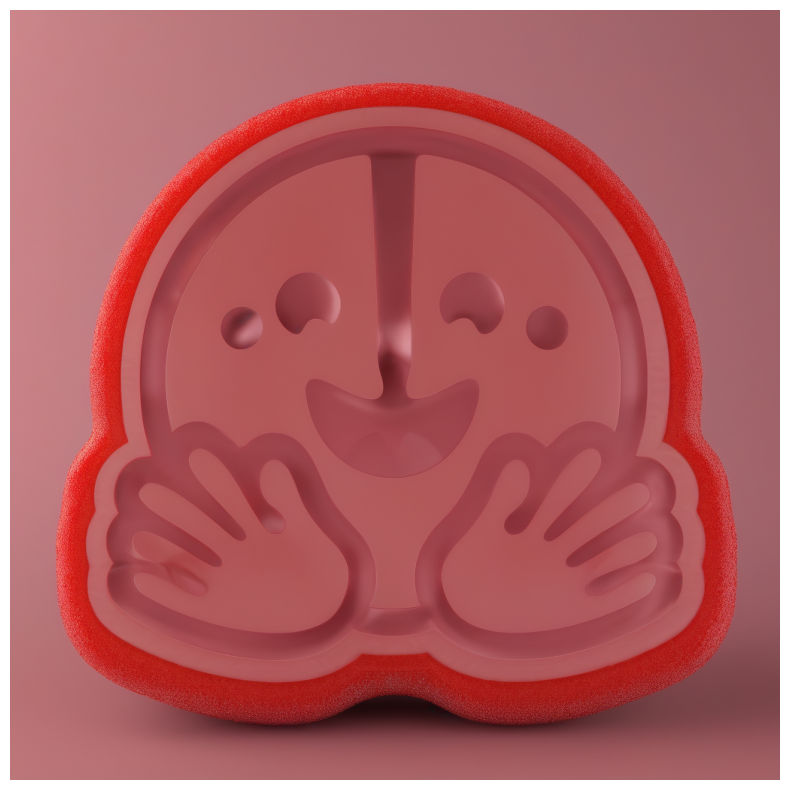

In [7]:
# HYPERPARAMS
prompt = "an extreme closeup shot of a red tomato, 3D, blender, food, 4k graphics, highly detailed, juicy food, sexy"
negative_prompt = "low quality, bad quality, sketches, extra digit, fewer digits, cropped, worst quality, low quality, glitch, deformed, mutated, ugly, disfigured"
src_img_url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/hf-logo.png"

# prepare source img
src_image = np.array(load_image(src_img_url))
src_image = cv2.Canny(src_image, 100, 200)
src_image = src_image[:, :, None]
src_image = np.concatenate([src_image, src_image, src_image], axis=2)
src_image = Image.fromarray(src_image)

# generate out img
out_img = pipe(prompt, negative_prompt=negative_prompt, image=src_image, controlnet_conditioning_scale=0.5).images[0]
time_now = datetime.datetime.now().strftime("%y.%m.%d_%H:%M:%S")
out_img.save(f"./{time_now}.png")
plt.figure(figsize=(10, 10))
plt.imshow(out_img)
plt.axis("off")
plt.show()